In [1]:
import numpy as np
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sympy.utilities.iterables import multiset_permutations
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

random_gen = np.random.default_rng(123)

<h3>Questão 1</h3>
<br>
<b>
a) Efetue as três primeiras iterações do cálculo de $\int_0^1 x_3 dx$ usando os três números aleatórios a seguir, que foram sorteados de uma distribuição uniforme no intervalo $[0, 1]$:
$$0.9501, 0.2311, 0.6068, \dots$$
</b>

In [2]:
# Número de iterações
N = 3

# Valores sorteados de uma distribuição uniforme. 
x_samps = np.array([0.9501, 0.2311, 0.6068])

# Cubo dos valores.
cube_x_samps = x_samps**3

# Acumulador da integral
result = 0

for n in range(N):
    # Para que cada iteração resulte na média dos valores encontrados até então, fazemos a divisão por n+1.
    # Por esse motivo, a próxima iteração precisa começar multiplicando por n, que desfaz a divisão feita. 
    result = (n * result + cube_x_samps[n])/(n+1)
    print(f"Iteração {n+1} = {result:.4f}")

Iteração 1 = 0.8576
Iteração 2 = 0.4350
Iteração 3 = 0.3645


<b>
b) Efetue as três primeiras iterações do cálculo de $\int_0^1 x^2 e^{-x} dx$ usando os quatro números aleatórios a seguir, que foram sorteados de uma distribuição exponencial $f_X(x) = e^{−x}$ no intervalo $[0, +\infty]$:
</b>
$$0.0512, 1.4647, 0.4995, 0.7216, \dots$$

O código é análogo ao item anterior, tomando o devido cuidado de somar apenas as parcelas referentes a valores $x$ obtidos na faixa $[0, 1]$ da integral. As parcelas não somadas ainda contam no cálculo da média.

In [3]:
N = 4

x_samps = np.array([0.0512,1.4647,0.4995,0.7216])
square_x_samps = x_samps**2

result = 0

for n in range(N):
    result *= n
    if x_samps[n] < 1:
        # Soma apenas se a parcela está na faixa da integral.
        result += square_x_samps[n]
    result /= (n+1)
    print(f"Iteração {n+1} = {result:.6f}")


Iteração 1 = 0.002621
Iteração 2 = 0.001311
Iteração 3 = 0.084041
Iteração 4 = 0.193207


<h3>Questão 2:</h3>
<br>
<b>    
Considere uma variável aleatória $X \in \{1, 2, 3, 4, 5\}$ e uma função custo $J(x) = (x − 3)^2.$ Considere $T = 1$.
<br>
a) Calcule os fatores de Boltzmann $e^{−\frac{J(x)}{T}}$, para $x = 1, 2, 3, 4, 5$.
</b>

In [4]:
# Iterador com os valores de x
X = range(1, 6)

# Temperatura fornecida 
T = 1

# Função custo fornecida
J = lambda x : (x - 3)*(x - 3)

# Fator de Boltzmann
boltz = lambda x : np.exp(-J(x)/T)

boltz_X = np.vectorize(boltz)(X)

for i in range(5):
    print(f"x = {X[i]};\tFator de Boltzmann = {boltz_X[i]:.4f}")

x = 1;	Fator de Boltzmann = 0.0183
x = 2;	Fator de Boltzmann = 0.3679
x = 3;	Fator de Boltzmann = 1.0000
x = 4;	Fator de Boltzmann = 0.3679
x = 5;	Fator de Boltzmann = 0.0183


<b>
b) Proponha um algoritmo para gerar uma distribuição de Boltzmann/Gibbs para a variável aleatória $X$, conforme os custos $J(x)$.
</b>

Podemos utilizar o algoritmo de Metropolis, particularizado para o domínio discreto \{1, ..., 5\} fornecido. Podemos considerar perturbações aleatórias com dois valores possíveis $\pm 1$, sendo estes rebatidos nas fronteiras (uma perturbação de $+1$ leva de $5$ a $1$, e uma perturbação de $-1$ realiza o caminho contrário.  

In [5]:
# Temperatura fornecida
T = 1

# Número de iterações
N = 100000

M = 90000
# Número de iterações até que as amostras passem a ser guardadas.
excl = N - M

# Função lambda que gera um valor aleatório uniforme entre 0 e 1. 
R = lambda : random_gen.uniform()

# Função custo fornecida
J = lambda x : (x - 3)*(x - 3)

# Fator de Boltzmann
boltz = lambda j : np.exp(-j/T)

# Perturbação de +- 1
pert = lambda : 2*np.random.randint(0, 2) - 1

# ====== Início do algoritmo:

# Inicializa x aleatoriamente no domínio.
x = np.random.randint(1, 6)

samples_q2 = np.array([])

for n in range(N):
    # Calcula a energia da amostra anterior.
    J_prev = J(x)
    
    # Calcula a próxima amostra candidata.
    x_cand = x + pert()
    # Rebate os valores nas fronteiras
    if x > 5:
        x -= 5
    elif x < 1:
        x += 5
    
    # Calcula a variação correspondente de energia
    delta_J = J(x_cand) - J_prev
    
    # Variações negativas são sempre aceitas
    if delta_J < 0:
        x = x_cand
        
    # Variações positivas são aceitas ou não de maneira probabilística.
    else:
        # Calcula o fator de Boltzmann para a variação de energia calculada.
        q = boltz(delta_J) 
        
        r = R()
        if r < q:
            # Amostra aceita
            x = x_cand
    
    # Não considera as primeiras excl amostras obtidas.
    if n < excl:
        continue
        
    samples_q2 = np.append(samples_q2, x)

Distribuição obtida:


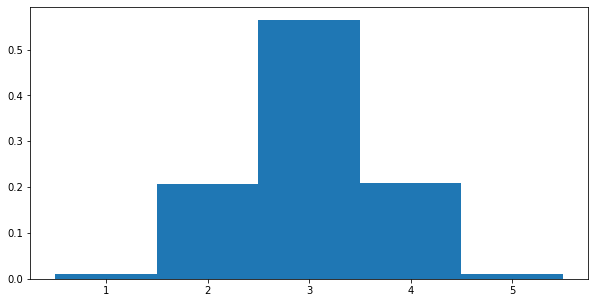

In [6]:
print("Distribuição obtida:")
bins = np.arange(1, 6.5) - 0.5
plt.hist(samples_q2, bins = bins, density=True)

#x_vec = range(1, 6)
#plt.plot(x_vec, boltz_X/np.sqrt(np.pi))
#plt.legend(["Distribuição gaussiana F_X(x)", "Distribuição obtida"])
pass

---
<h3>Questão 3:</h3>
<br>
<b>
Escrever um algoritmo para gerar números x(n) com energia $J(x) = x^2$, de forma que as probabilidades dos números gerados sejam proporcionais aos fatores de Boltzmann $e^{−\frac{J(x)}{T}}$, com temperatura $T = 0.1$. Começando de um valor $x(0)$ qualquer, aplique sempre perturbações $\epsilon R$ ao valor $x(n)$ atual. Neste caso, R é
uma variável aleatória uniforme. Considere $\epsilon = 0.1$:
</b>

Neste caso, notamos que, devido à função $J(x)$ fornecida, as amostras são obtidas com densidade Gaussiana $F_X(x) = \frac{1}{\sqrt{\pi T}} e^{-\frac{x^2}{T}}$.

In [7]:
# Definições da questão.
T = 0.1
eps = 0.5
J = lambda x : x*x
boltz = lambda j : np.exp(-j/T)

# Definições de iterações
N = 100000
M = 90000
excl = N - M

# Gera um valor aleatório uniforme entre 0 e 1. 
U = lambda : random_gen.uniform()

# Gera um valor aleatório uniforme entre -1 e 1
R = lambda: 2*U() - 1


# ====== Início do algoritmo:

# Arbitrando uma condição inicial nula.
x = 0.0 
samples_q3 = np.array([])

for n in range(N):
    # Calcula a energia da amostra anterior.
    J_prev = J(x)
    # Calcula a próxima amostra candidata e a variação de energia correspondente.
    x_cand = x + eps*R()
    delta_J = J(x_cand) - J_prev
    
    # Variações negativas de energia são sempre aceitas
    if delta_J < 0:
        x = x_cand
        
    # Variações positivas são aceitas ou não de maneira probabilística, de acordo com o fator de Boltzmann
    else:
        # Calcula o fator de Boltzmann para a variação de energia calculada.
        q = boltz(delta_J)  
        r = U()       
        if r < q:
            # Amostra aceita
            x = x_cand
    
    if n < excl:
        continue
        
    samples_q3 = np.append(samples_q3, x)

Distribuição obtida:


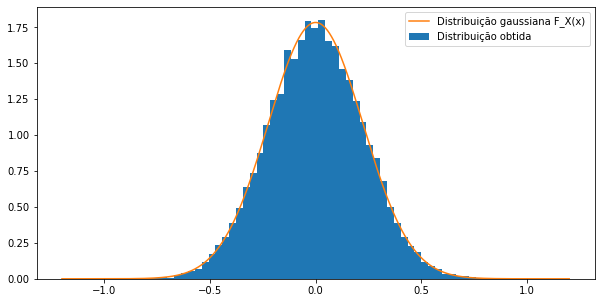

In [8]:
print("Distribuição obtida:")
plt.hist(samples_q3, bins = 60, density=True)

x_vec = np.linspace(-1.2, 1.2, 1000)
plt.plot(x_vec, np.vectorize(lambda x : np.sqrt(10/np.pi) * np.exp(-x*x/0.1))(x_vec))
plt.legend(["Distribuição gaussiana F_X(x)", "Distribuição obtida"])

pass

---
<h3>Questão 4</h3>
<br>
<b>
Nos itens a seguir, considere o uso do algoritmo de Metropolis e de uma variável aleatória binária $R$ (com dois valores equiprováveis, ou seja, $p_R(0) = p_R(1) = 0.5$) para a geração de uma variável aleatória X com função densidade de probabilidade arbitrária, dada por $f_X(x)$:
<br><br>
a) Qual deve ser a função custo $J(x)$, para que a densidade de probabilidade de $x$ seja $f_X(x)$?
</b>



Sabemos que, no algoritmo de Metropolis, os valores $x$ são amostrados com densidade proporcional ao fator de Boltzmann: 

$$w(x)\propto e^{-\frac{J(x)}{T_1}}$$,

onde $T$ é constante. Então, para obtermos a densidade desejada, podemos fazer:

\begin{align}
f_X(x) = C_2 e^{-\frac{J(x)}{C_1}} \\
\ln{f_X(x)} = \ln{\left(C_2 e^{-\frac{J(x)}{C_1}}\right)} \\
\ln{f_X(x)} = \ln{C_2} - \frac{J(x)}{C_1} \\
J(x) = C_1 (\ln{C_2} - \ln{f_X(x)}),
\end{align}

onde $C_2 > 0$ é o fator de normalização que torna $f_X(x)$ uma densidade de probabilidade válida. Entretanto, o algoritmo de Metropolis depende apenas de variações $\Delta(J(x))$, de modo que o fator $\ln{C_2}$ pode ser ignorado. Além disso, podemos escolher $T = 1$. Com isso, temos a função de custo:

\begin{align}
J(x) = -\ln{f_X(x)}
\end{align}

<b>
b) Utilizando um pseudo-código, descreva o algoritmo de Metropolis aplicado à geração da variável aleatória em questão. Defina e use os parâmetros (tamanho da perturbação, número de iterações etc.) que você julgar necessários.
</b>

Para realizar a questão, foi arbitada uma distribuição $f_X(x)$ triangular simétrica de média $0$ e largura $2$. 

In [9]:
# Definições:
F = lambda x : max(0.0, 1 - abs(x))

# Função custo obtida no item anterior.
J = lambda x : -np.log(F(x)) if F(x) != 0 else np.inf # O caso f_X(x) = 0 é tratado atribuindo infinito à energia, de modo que o estado nunca será aceito.

# Fator de Boltzmann discutido no item anterior.
T = 1
boltz = lambda j : np.exp(-j/T)


# Tamanho da perturbação
eps = 0.05

# Definições de iterações
N = 100000
M = 90000
excl = N - M

# Gera um valor aleatório uniforme entre 0 e 1. 
U = lambda : random_gen.uniform()

# Variável aleatória binária definida na questão
R = lambda: np.random.randint(0, 2)

# Perturbação associada. Quando R = 1: perturbação de +eps. Quando R = -1: perturbação de -eps
pert = lambda: (2*R() - 1)*eps

# ================ Início do algoritmo:

# O algoritmo é análogo aos das questões anteriores.

x = 0.03
samples_q4 = np.array([])

for n in range(N):
    J_prev = J(x)
    # Aqui é utilizada a função perturbação adequada, levando em consideração a variável R binária.
    x_cand = x + pert()
    delta_J = J(x_cand) - J_prev 
    if delta_J < 0:
        x = x_cand
    else:
        q = boltz(delta_J)  
        r = U()
        if r < q:
            x = x_cand   
    if n < excl:
        continue
        
    samples_q4 = np.append(samples_q4, x)

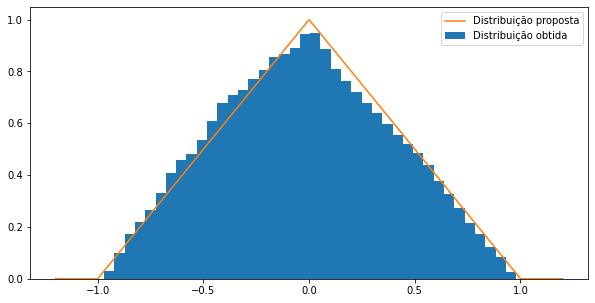

In [10]:
plt.hist(samples_q4, bins = 40, density=True)

x_vec = np.linspace(-1.2, 1.2, 1000)
plt.plot(x_vec, np.vectorize(F)(x_vec))
plt.legend(["Distribuição proposta", "Distribuição obtida"])
pass

---
<h3> Questão 5</h3>
<br>
<b>
Considere a seguinte expressão:
\begin{align}
    \int_{|x_2| < 1} \int_{|x_1| < 1} (x_1^2 + x_2^2)e^{-(x_1^2 + x_2^2)}dx_1 dx_2
\end{align}
a) Escreva, utilizando um pseudo-código, um programa para a geração de vetores aleatórios (x1, x2) que
tenham uma densidade conveniente para uma avaliação eficiente desta expressão.
<br><br>
<b>
b) Explique como os vetores gerados pelo programa do item (a) podem ser utilizados para a avaliação da integral.
</b>

Definindo $\mathbf{x} = (x_1, x_2)$, podemos escolher:

\begin{align}
J(\mathbf{x}) = x_1^2 + x_2^2
\end{align}

Utilizando esse $J$ definido como função de custo e realizando o algoritmo de Metropolis, as amostras são obtidas com densidade proporcional ao fator de Boltzmann (para $T = 1$):

\begin{align}
w(\mathbf{x}) = \frac{e^{-(x_1^2 + x_2^2)}}{Z},
\end{align}

onde Z é uma constante de normalização, calculada por $\int \int e^{-J(\mathbf{x})}dx$.

Notamos, então, que a integral que desejamos calcular corresponde a:
\begin{align}
    Z\int_{|x_2| < 1} \int_{|x_1| < 1} J(\mathbf{x})w(\mathbf{x})dx_1 dx_2
\end{align}

Com isso, um procedimento procedimento pode ser proposto para o cálculo da integral desejada:

1. Realizar o algoritmo de Metropolis para gerar amostras com a densidade $w(\mathbf{x})$ proposta, acumulando a média do valor de $J(\mathbf{x})$ obtido. Isso corresponde a calcular a integral da expressão anterior (sem o fator Z)

2. Calcular o fator $Z$ (por exemplo, por Monte Carlo com amostragem uniforme) e multiplicá-lo pelo valor obtido anteriormente



Resultado da integral = 1.1284

Amostras obtidas:


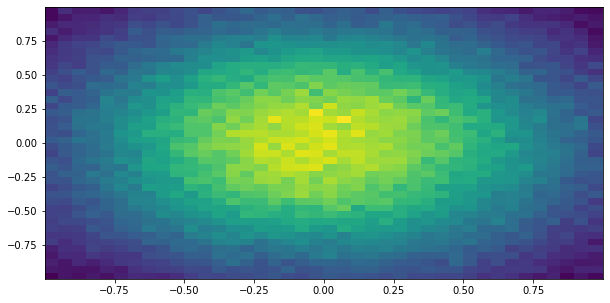

In [11]:
# Função custo.
J = lambda x : x[0]*x[0] + x[1]*x[1] if abs(x[0]) < 1 and abs(x[1]) < 1 else np.inf

# Fator de Boltzmann.
boltz = lambda j : np.exp(-j)


# Tamanho da perturbação
eps = 0.2

# Definições de iterações
N = 1000000
M = 900000
excl = N - M

# Gera um valor aleatório uniforme entre 0 e 1. 
U = lambda : random_gen.uniform()

# Gera um vetor de dois elementos aleatórios uniformes entre -1 e 1
R = lambda: 2 * random_gen.uniform(size=2) - 1

# ================ Início do algoritmo:

# O algoritmo é análogo aos das questões anteriores, com a modificação para o cálculo da integral.

x = np.array([0.00, 0.00]) 
samples_q5 = []

# Variável que acumula o valor da integral obtida por Metropolis.
integral_metr = 0.0


for n in range(N):
    J_prev = J(x)
    x_cand = x + eps*R()
    delta_J = J(x_cand) - J_prev 
    if delta_J < 0:
        x = x_cand
    else:
        q = boltz(delta_J)  
        r = U()
        if r < q:
            x = x_cand   
    if n < excl:
        continue
        
    samples_q5.append(x)
    
    integral_metr += J(x) 
    
integral_metr /= M
samples_q5 = np.array(samples_q5)

# Cálculo do fator de correção para a integral
X = 2 * random_gen.uniform(size=(M, 2)) - 1
l = np.apply_along_axis(J, axis=1, arr=X)
fator_Z = 4*np.sum(np.exp(-l))/M

integral = integral_metr * fator_Z

print(f"Resultado da integral = {integral:.4f}", end="\n\n")

print("Amostras obtidas:")
plt.hist2d(samples_q5[:,0], samples_q5[:,1], bins = 40, density=True)
pass

---
<h3>Questão 6 </h3>
<br>
<b>
Nesta questão, consideramos o problema da descrição de todas as configurações possíveis de um sistema com 5 partículas em duas dimensões. A posição de cada partícula é definida por um vetor $\mathbf{x}_i$, $i = 1, 2, \dots, 5$ e o estado do sistema é definido por um vetor $\mathbf{x}$ contendo todas as 10 coordenadas. Duas configurações particulares são mostradas na figura do item (b). A função custo na qual estamos interessados é uma combinação linear entre a soma das normas dos vetores xi e a soma das “repulsões eletrostásticas” entre as partículas, imaginando o caso em que todas são positivas:
\begin{align}
    J(\mathbf{x}) = \sum_i ||\mathbf{x}_i||^2 + \frac{1}{\sum_{i \neq j} ||\mathbf{x}_i - \mathbf{x}_j||^2}
\end{align}
<br><br>
a) Escreva, utilizando pseudo-código, uma implementação do algoritmo de Metropolis que, para temperatura T e a partir de uma configuração inicial qualquer, permita a geração de estados seguindo uma distribuição de Boltzmann em função dos seus custos J.
</b>

In [12]:
# Definições:

# O nosso estado será representado por uma matriz 5x2 (n_parts x n_dims).
n_parts = 5
n_dims = 2

# Função custo.
def J(x, n_parts):
    # Calcula a norma dos vetores x_i
    energy = np.sum(np.square(x), axis=None)
    for i in range(n_parts-1):
        for j in range(i+1, n_parts):
            # Soma as parcelas referentes às repulsões eletroestáticas
            energy += 1./np.sum(np.square(x[i, :] - x[j, :]))
    return energy


# Valor arbitrário para a temperatura T
T = 1
boltz = lambda j : np.exp(-j/T)

# Tamanho da perturbação
eps = 0.5

# Definições de iterações
N = 100000
M = 90000
excl = N - M

# Gera um valor aleatório uniforme entre 0 e 1. 
U = lambda: random_gen.uniform()

# Gera uma matriz 5x2 de elementos aleatórios uniformes entre -1 e 1
R = lambda n_parts, n_dims: 2*random_gen.uniform(size=(n_parts, n_dims)) - 1

# ================ Início do algoritmo:

# O algoritmo é análogo aos das questões anteriores, com as adaptações de dimensões.

# Em vez de arbitrar um estado inicial nulo, iniciamos X aleatoriamente para evitar divisões por zero.
x = eps*R(n_parts, n_dims)

samples_q6 = []
J_memory = []

for n in range(N):
    J_prev = J(x, n_parts)
    x_cand = x + eps*R(n_parts, n_dims)
    delta_J = J(x_cand, n_parts) - J_prev
    if delta_J < 0:
        x = x_cand
    else:
        q = boltz(delta_J)  
        r = U()
        if r < q:
            x = x_cand   
    if n < excl:
        continue
        
    samples_q6.append(x)

samples_q6 = np.array(samples_q6)

# Neste caso, não podemos visualizar os estados em histograma devido à dimensão.

J_memory = np.array([J(x, n_parts) for x in samples_q6])

<b>
b) Para as duas soluções locais a seguir, uma expressão simplificada para $J$ pode ser calculada em função da variável escalar positiva $r$:

\begin{align}
    J_1(r) = 4r^2 + \frac{6.5}{r^2} \\
    J_2(r) = 5r^2 + \frac{5}{r^2}
\end{align}

Assumindo $T = 0.1$, calcule a proporção entre as probabilidades de um estado que tem a configuração da direita com r = 1.0000 e outro estado que tem a configuração da esquerda com r = 1.1291.

In [13]:
# Define as expressões simplificadas:
j1_func = lambda r : 4.*r*r + 6.5/(r*r)
j2_func = lambda r : 5.*r*r + 5./(r*r)

r_1 = 1.1291
r_2 = 1.

# Calcula as energias para as configurações com os valores de r fornecidos.
j1 = j1_func(r_1)
j2 = j2_func(r_2)

# Calcula os fatores de Boltzmann correspondentes, que são proporcionais às probabilidades de estado.
boltz1 = boltz(j1)
boltz2 = boltz(j2)

# Calcular a proporção entre os fatores.
prop = boltz1/boltz2

print(f"J_1({r_1:.4f}) = {j1:.4f}, Boltzman = {boltz1}")
print(f"J_2({r_2:.4f}) = {j2:.4f}, Boltzman = {boltz2}")

print(f"O primeiro estado é {prop:.4f} tão provável quanto o segundo estado.")


J_1(1.1291) = 10.1980, Boltzman = 3.7243278718922124e-05
J_2(1.0000) = 10.0000, Boltzman = 4.5399929762484854e-05
O primeiro estado é 0.8203 tão provável quanto o segundo estado.


<b>
c) Considere a definição da variável aleatória “distância média à origem”: $L(x) = (1/5) \sum_i ||x_i||$. Explique como o algoritmo do item (a) é modificado, de forma que possamos calcular o valor médio de L a uma temperatura T arbitrária.
</b>

Poderíamos calcular o valor médio de $L$ de maneira análoga à realizada na questão anterior. O valor médio desejado corresponde a: 

\begin{align}
E[L(x)] &= \int \int_{\mathbf{x} \in \mathbb{R}^2} L(\mathbf{x})f_\mathbf{X}(\mathbf{x}) d\mathbf{x} \\
&= \int \int_{\mathbf{x} \in \mathbb{R}^2} L(\mathbf{x})e^{-\frac{J(\mathbf{x})}{T} } d\mathbf{x}
\end{align}

Se acumularmos os valores de L(x) ao longo da execução do algoritmo, e calcularmos uma média destes, obtemos o resultado da integral acima exceto por um fator constante $Z$ de normalização da PDF, que corresponde a $Z = \int \int e^{-J(\mathbf{x})}dx$ e pode ser calculado por Monte Carlo com amostragem uniforme.

---
<h3>Questão 7</h3>
<br>
<b>
Escrever um programa de S.A. (pode ser pseudo-código) para minimizar a função escalar $J(x) = −x + 100(x − 0.2)^2(x − 0.8)^2$, começando de $x(0) = 0$ e utilizando geradores de números aleatórios (um uniforme e outro
Gaussiano).
</b>

In [14]:
# Definições.

# Custo fornecido.
J = lambda x: -x + 100*(x - 0.2)*(x - 0.2)*(x - 0.8)*(x - 0.8)  

# Fator de Boltzmann, notando a dependência em relação à temperatura variável.
boltz = lambda j, T : np.exp(-j/T)

# Número de iterações em cada temperatura.
N = 10000

eps = 0.5

# Número de temperaturas consideradas
K = 12

# Temperatura inicial
T0 = 5

# Gerador de temperaturas decrescentes logaritmicamente (primeira iteração é com k = 0).
T = lambda T0, k : T0/np.log2(2 + k) 

# Gera um valor aleatório uniforme entre 0 e 1. 
U = lambda : random_gen.uniform()

# Gera um valor aleatório gaussiano de média 0 e variância 1.
R = lambda: random_gen.normal()


# ====== Início do algoritmo:

# Escolhendo x(0) = 0.
x = 0.0

J_min = np.inf
x_min = x

for k in range(K):
    t = T(T0, k)
    for n in range(N):
        # Calcula a energia da amostra anterior.
        J_prev = J(x)
        # Calcula a próxima amostra candidata e sua energia.
        x_cand = x + eps*R()
        J_cand = J(x_cand)
        # Calcula a variação de energia correspondente.
        delta_J = J_cand - J_prev
        
        # Calcula o fator de Boltzmann para a variação de energia calculada, com a temperatura atual.
        q = boltz(delta_J, t)  
        
        r = U()
        if r < q:
            # Amostra aceita
            x = x_cand
            if J_cand < J_min:
                # Amostra corresponde ao mínimo de energia (até o momento).
                J_min, x_min = J_cand, x_cand
                
print(f"Ponto de mínimo: x = {x_min:.4f}")
print(f"Energia mínima: J = {J_min:.4f}")

Ponto de mínimo: x = 0.8130
Energia mínima: J = -0.8066


Podemos verificar o resultado obtido analiticamente. Notando que $J$ é diferenciável em todo $\mathbb{R}$, basta encontramos os pontos críticos de $J$:
\begin{align}
    J'(x) &= 0 \\
    400 x^3 - 600 x^2 + 264x -33 &= 0 \\
    x_1 \approx 0.2150,\quad x_2 &\approx 0.4720,\quad x_3 \approx 0.8130
\end{align}

E, de fato, $J(x_3) < J(x_1) < J(x_2)$. Logo, $x_3$ é realmente mínimo global.

---
<h3>Questão 8</h3>
<br>
<b>
Proponha uma função de até 4 variáveis cujo ponto mínimo você conheça, e encontre este ponto mínimo
utilizando S.A. (neste exercício, basta entregar o código escrito).
</b>

A função proposta é:
\begin{align}
    J(x, y) = x^2 + 2y^2 + 20 sen^2(x) + 10 sen^2(y)
\end{align}

Esta função tem, claramente, um único mínimo global em $(0, 0)$, com com energia $J(0, 0) = 0$. Entretanto, a presença dos termos senoidais com altos coeficientes em relação aos polinomiais resultam em uma prevalência de ondulações e mínimos locais.

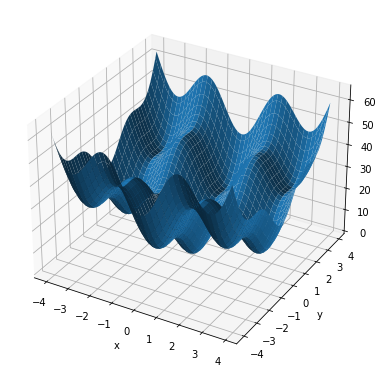

In [15]:
x = np.arange(-4, 4, 0.1)
y = np.arange(-4, 4, 0.1)

X, Y = np.meshgrid(x, y)
nu = X**2 + 2*Y**2 + 20 * np.sin(X)**2 + 10 * np.sin(Y)**2 

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, nu)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [16]:
# Definições.

# Custo proposto.
J = lambda x:  x[0]*x[0] + 2*x[1]*x[1] + 20 * np.sin(x[0])*np.sin(x[0]) + 10*np.sin(x[1])*np.sin(x[1])

# O código é analogo ao exemplo anterior, adaptado para o caso bidimensional.


boltz = lambda j, T : np.exp(-j/T)

N = 40000
eps = 0.5
K = 30
T0 = 10

T = lambda T0, k : T0/np.log2(2 + k) 
U = lambda : random_gen.uniform()

# Gera uma vetor de dois elementos aleatórios gaussianos com média 0 e variância 1.
R = lambda: random_gen.normal(size=2)


# ====== Início do algoritmo:

# Escolhendo x(0) como aleatório em torno de (3, 3), escolhido arbitrariamente para não começar no mínimo global.
x = R() + 3

J_min = np.inf
x_min = x

for k in range(K):
    t = T(T0, k)
    for n in range(N):
        J_prev = J(x)
        x_cand = x + eps*R()
        J_cand = J(x_cand)
        delta_J = J_cand - J_prev
        q = boltz(delta_J, t)  
        
        r = U()
        if r < q:
            x = x_cand
            if J_cand < J_min:
                J_min, x_min = J_cand, x_cand
                
print(f"Ponto de mínimo: x = {x_min}")
print(f"Energia mínima: J = {J_min:.4f}")

Ponto de mínimo: x = [-0.00044775 -0.00063451]
Energia mínima: J = 0.0000


---
<h3>Questão 9</h3>
<br>
<b>
A figura a seguir ilustra todas as soluções possíveis do problema do caixeiro viajante com cinco cidades, no caso em que as cinco cidades estão dispostas uniformemente sobre um círculo, e considerando que a viagem sempre começa pela cidade mais à direita. A seta pontilhada indica o caminho de retorno da última cidade visitada para a cidade inicial. Considera-se que o custo da viagem sobre um lado do pentágono formado pelas cidades é igual a 1.0. O custo total de cada solução é representado logo abaixo da mesma,
<br><br>
a) Utilizando um pseudo-código, descreva um algoritmo de Simulated Annealing para resolver este problema. Defina e use quaisquer parâmetros (por exemplo: temperatura inicial, método de resfriamento, número de iterações a temperatura fixa, etc.) que você julgar necessários.
</b>

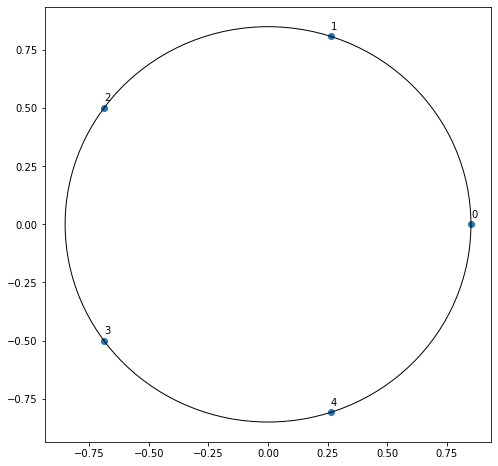

In [17]:
# Estabelece as posições das cinco cidades dispostas uniformemente no círculo.

# Obtém as coordenadas no plano complexo das cidades, resolvendo o polinômio x^5 = r^5.
# r é escolhido como sin(pi/2)/(2*sin(pi/5)) para que os lados do pentágono sejam normalizados para 1.
complex_coords = Polynomial([-(np.sin(np.pi/2)/(2*np.sin(np.pi/5)))**5, 0, 0, 0, 0, 1]).roots()

# Converte as coordenadas do plano complexo para o R^2.
coords = np.stack( (np.real(complex_coords), np.imag(complex_coords)), axis=-1 ) # Transforma em coordenadas no R^2.

# Reordena as coordenadas, para começar da raiz real positiva e seguir em sentido anti-horário.
coords = coords[[4, 3, 1, 0, 2]]


# Plota as coordenadas no R^2, com os rótulos dos pontos.
plt.rcParams['figure.figsize'] = [8, 8]
circle = plt.Circle((0, 0), (np.sin(np.pi/2)/(2*np.sin(np.pi/5))), color='black', fill=False)
ax = plt.gca()
ax.add_patch(circle)
plt.scatter(coords[:,0], coords[:,1])
for i in range(5):
    plt.annotate(f"{i}", (coords[i, 0], coords[i, 1]), xytext=(coords[i, 0], coords[i, 1]+0.03))

In [18]:
# Calcula a função custo, definida como a soma das distâncias dos caminhos percorridos. 
# x corresponde a um vetor de inteiros distintos de 0 a 5, que indexam as posições de coords.
J = lambda x: np.sum(np.linalg.norm(coords[x] - coords[np.roll(x, -1)], axis=1))


# Gera o próximo x candidato a partir de uma permutação aleatória entre dois elementos do x atual, exceto o primeiro elemento (que é sempre o ponto mais à direita).
def generate_permutation(x):
    perm_indexes = random_gen.choice(range(1, 5), size=2, replace=False)
    new_x = x.copy()
    new_x[perm_indexes[0]], new_x[perm_indexes[1]] = new_x[perm_indexes[1]], new_x[perm_indexes[0]]
    return new_x


# As demais definições e o algoritmo são análogos ao caso anterior.

boltz = lambda j, T : np.exp(-j/T)
N = 10000
K = 12
T0 = 5

T = lambda T0, k : T0/np.log2(2 + k) 
U = lambda : random_gen.uniform()


# ====== Início do algoritmo:

# Inicializando x como um vetor aleatório de permutações, sendo o primeiro elemento sempre 0.
x = np.random.permutation(range(1, 5))
x = np.insert(x, 0, 0)

J_min = np.inf
x_min = x

for k in range(K):
    t = T(T0, k)
    for n in range(N):
        J_prev = J(x)
        x_cand = generate_permutation(x)
        J_cand = J(x_cand)
        delta_J = J_cand - J_prev
        
        q = boltz(delta_J, t)  
        
        r = U()
        if r < q:
            x = x_cand
            if J_cand < J_min:
                J_min = J_cand
                x_min = x_cand

print(f"Trajetória de energia mínima: x = {x_min}")
print(f"Energia mínima: J = {J_min:.4f}")

Trajetória de energia mínima: x = [0 1 2 3 4]
Energia mínima: J = 5.0000


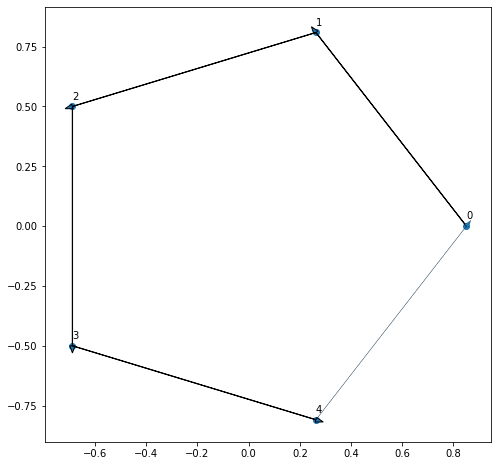

In [19]:
# Plota a trajetória de energia mínima obtida. 

plt.scatter(coords[:,0], coords[:,1])
for i in range(5):
    plt.annotate(f"{i}", (coords[i, 0], coords[i, 1]), xytext=(coords[i, 0], coords[i, 1]+0.03))
    
    
for i in range(0, 5):
    if i == 4:
        plt.arrow(coords[x_min[i]][0], coords[x_min[i]][1], 
              coords[x_min[(i+1)%5]][0] - coords[x_min[i]][0],
              coords[x_min[(i+1)%5]][1] - coords[x_min[i]][1],
              head_width=0.02, linestyle="--", linewidth="0.2"
             )
    else:
        plt.arrow(coords[x_min[i]][0], coords[x_min[i]][1], 
              coords[x_min[(i+1)%5]][0] - coords[x_min[i]][0],
              coords[x_min[(i+1)%5]][1] - coords[x_min[i]][1],
              head_width=0.02
             )

<b>
b) Com temperatura fixa $T = 1$, calcule a probabilidade com que cada uma das soluções acima será gerada, após a convergência do algoritmo.
</b>

In [21]:
t = 1
x_cut = np.array(list(range(1, 5)))
X_array = []
prob_array = []
prob_sum = 0.0

for perm in multiset_permutations(x_cut):
    x = np.insert(perm, 0, 0)
    X_array.append(x)
    j = J(x)
    prob = boltz(j, t)
    prob_array.append(prob)
    print(j)
    prob_sum += prob
    
prob_array /= prob_sum
    
for i in range(len(X_array)):
    print(f"Trajetória {X_array[i]}: Probabilidade: {100*prob_array[i]:.4f}%")

5.000000000000001
6.236067977499792
6.236067977499789
6.8541019662496865
6.854101966249685
6.23606797749979
6.236067977499792
6.8541019662496865
6.854101966249684
6.23606797749979
8.090169943749476
6.854101966249686
6.854101966249686
8.090169943749476
6.23606797749979
6.854101966249684
6.8541019662496865
6.236067977499792
6.23606797749979
6.854101966249685
6.8541019662496865
6.236067977499789
6.236067977499792
5.000000000000001
Trajetória [0 1 2 3 4]: Probabilidade: 15.2389%
Trajetória [0 1 2 4 3]: Probabilidade: 4.4273%
Trajetória [0 1 3 2 4]: Probabilidade: 4.4273%
Trajetória [0 1 3 4 2]: Probabilidade: 2.3863%
Trajetória [0 1 4 2 3]: Probabilidade: 2.3863%
Trajetória [0 1 4 3 2]: Probabilidade: 4.4273%
Trajetória [0 2 1 3 4]: Probabilidade: 4.4273%
Trajetória [0 2 1 4 3]: Probabilidade: 2.3863%
Trajetória [0 2 3 1 4]: Probabilidade: 2.3863%
Trajetória [0 2 3 4 1]: Probabilidade: 4.4273%
Trajetória [0 2 4 1 3]: Probabilidade: 0.6933%
Trajetória [0 2 4 3 1]: Probabilidade: 2.3863%
Tra